## Intro

For the ECT project, I wrote py code to leverage gensim's (& spaCy's) capabilities. 

A few routines later, decided to putup on github from where I could source in these routines and get a clean func.

These routines include model selection (for optimal #topics) using coherence scores (I prefer this) and perplexity scores.

Below is what is needed (and examples) from end-user's POV to achieve the same.

Behold. Only.

In [14]:
## Sourcing LTM gensim funcs in py from github 
sourcePy_path = 'https://raw.githubusercontent.com/sudhir-voleti/general/master/LTM%20gensim%20github%20funcs.py'
import requests
exec(requests.get(sourcePy_path).text)

Following funcs were imported (self-explanatory only, eh?)

#### Pre-processing and Prep for Gensim

- routine 1 - textclean per doc: *textClean(corpus_raw)*

- routine 1a - processing raw data: *build_gensim_corpus(corpus_raw)*


#### Gridsearch and Plotting for Model Selection

- routine 2 - gridsearch on coherence vals: *compute_coherence_values(dictionary, corpus_gensim, corpus_tokenized, num_topics1)*

- routine 2a - *plot_coherence(coherence_values, num_topics_list)* metrics. input is outp of prev func

- routine 3 - gridsearch via perplexity scores: *compute_perplexity_values(model_list, corpus, num_topics_list)*

- routine 3a - plot perplexity metrics: *plot_perplexity(perplexity_values, num_topics_list)*


#### Obtain Factor Matrices

- routine 4 - get factor matrices: *build_beta_df(lda_model, id2word)*

- routine 4a - get gamma matrix: *build_gamma_df(lda_model, corpus_raw)*

- routine 5 - get dominant Topic DF: *domi_topic_df(gamma_df)*

#### Invoke final, Wrapper func

- routine 7 - get outputs for optimal K: *ltm_outp_df(model_list, num_topics_list, id2word, K)*

In [8]:
# read in file from github Nokia dataset
import urllib.request

url = "https://raw.githubusercontent.com/sudhir-voleti/sample-data-sets/master/text%20analysis%20data/amazon%20nokia%20lumia%20reviews.txt"
nokia = urllib.request.urlopen(url).readlines()
print(type(nokia))
print(len(nokia))

<class 'list'>
120


build_gensim_corpus done.

2
4
6
8
10
12
14
16
18
20
22
24
26
28
grid searches done.



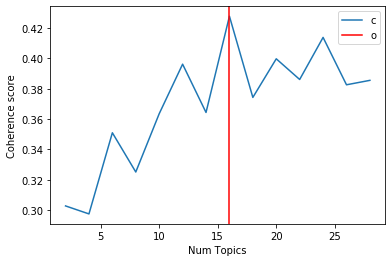

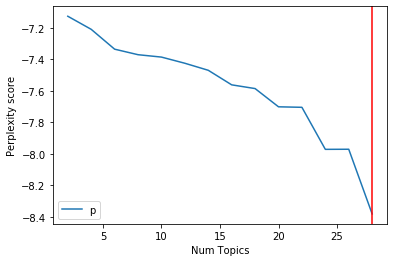

opt_num_topics_coher:  16
opt_num_topics_perpl:  28
optimal num_topix:  16 

K1:  7 

factor matrices done.

121.5473403930664  secs


In [16]:
# declare corpus_raw as the raw corpus
corpus_raw = nokia
stop_words.extend(['phone', 'phones'])  # if needed

# declare parm vals
start1=2; limit1=30; step1=2
num_topics_list = [x for x in range(start1, limit1, step1)]; num_topics_list    

# now invoke wrapper LTM func
t1 = time.time()
beta_df, gamma_df, sent_topics_df, optimal_model = ltm_wrapper(corpus_raw, num_topics_list)
t2 = time.time(); print(t2 - t1, " secs")   # 121 secs

In [17]:
# Explore outputs a tad, eh?
print(beta_df.shape)
beta_df.iloc[:10, :]

(2002, 17)


,tokens,topic01,topic02,topic03,topic04,topic05,topic06,topic07,topic08,topic09,topic10,topic11,topic12,topic13,topic14,topic15,topic16
accurate,accurate,0.000077,0.000469,0.000377,0.000117,0.000431,0.000420,0.000377,0.000439,0.000398,0.000403,0.000829,0.000221,0.000359,0.000134,0.000028,0.000249
action,action,0.000667,0.000469,0.000377,0.000117,0.000431,0.000420,0.000377,0.000439,0.000398,0.000403,0.000840,0.000221,0.000359,0.000134,0.000028,0.000249
adjust,adjust,0.000667,0.000469,0.000377,0.000117,0.000431,0.000420,0.000377,0.000439,0.000398,0.000403,0.000840,0.000221,0.000359,0.000134,0.000028,0.000249
already,already,0.003065,0.000469,0.000377,0.000117,0.000432,0.000420,0.000377,0.000439,0.000398,0.000403,0.000095,0.000221,0.000359,0.000137,0.000892,0.000249
apart,apart,0.000077,0.000469,0.000377,0.000117,0.000431,0.000420,0.000377,0.000439,0.000398,0.000403,0.000829,0.000221,0.000359,0.000134,0.000028,0.000249
app,app,0.001674,0.000469,0.000377,0.000118,0.000432,0.000420,0.000377,0.000439,0.000398,0.000403,0.017326,0.000302,0.000359,0.000137,0.002217,0.000249
apps,apps,0.000089,0.000469,0.000378,0.002174,0.000433,0.000421,0.000377,0.000441,0.000398,0.000403,0.007883,0.000230,0.000359,0.000144,0.015057,0.000251
area,area,0.001250,0.000469,0.000377,0.000117,0.000431,0.000420,0.000377,0.000439,0.000398,0.000403,0.000890,0.003611,0.000359,0.000134,0.000028,0.000249
attendant,attendant,0.000077,0.000469,0.000377,0.000117,0.000431,0.000420,0.000377,0.000439,0.000398,0.000403,0.000829,0.000221,0.000359,0.000134,0.000028,0.000249
better,better,0.000080,0.000469,0.000378,0.000117,0.000432,0.000420,0.000377,0.000439,0.000398,0.000403,0.000994,0.000221,0.000359,0.000134,0.004352,0.000249


In [18]:
print(gamma_df.shape)
gamma_df.iloc[:10,:]

(120, 16)


,topic01,topic02,topic03,topic04,topic05,topic06,topic07,topic08,topic09,topic10,topic11,topic12,topic13,topic14,topic15,topic16
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.499639,0.000000,0.0,0.000000,0.497389,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.996842,0.000000
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.143753,0.294765,0.0,0.000000,0.545764,0.000000
3,0.000000,0.0,0.0,0.332740,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.655529,0.000000
4,0.063400,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.049351,0.000000,0.0,0.305353,0.578949,0.000000
5,0.000000,0.0,0.0,0.046312,0.018951,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.926842,0.000000
6,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.557325,0.417203,0.000000
7,0.508890,0.0,0.0,0.059329,0.000000,0.0,0.000000,0.0,0.0,0.0,0.060445,0.000000,0.0,0.000000,0.368489,0.000000
8,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.980588
9,0.520758,0.0,0.0,0.000000,0.000000,0.0,0.054941,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.398706,0.000000


In [19]:
print(sent_topics_df.shape)
sent_topics_df.iloc[:10,:]

(120, 4)


,Doc_num,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0.0,10.0,0.4996,"like, text, good, br, app, come, live, tile, u..."
1,1.0,14.0,0.9968,"br, window, great, apps, nokia, love, use, mus..."
2,2.0,14.0,0.5458,"br, window, great, apps, nokia, love, use, mus..."
3,3.0,14.0,0.6555,"br, window, great, apps, nokia, love, use, mus..."
4,4.0,14.0,0.5789,"br, window, great, apps, nokia, love, use, mus..."
5,5.0,14.0,0.9268,"br, window, great, apps, nokia, love, use, mus..."
6,6.0,13.0,0.5573,"good, data, still, iphone, connection, unfortu..."
7,7.0,0.0,0.5089,"br, contact, number, far, new, day, pc, one, o..."
8,8.0,15.0,0.9806,"new, price, happy, good, problem, perfect, bes..."
9,9.0,0.0,0.5208,"br, contact, number, far, new, day, pc, one, o..."


### Saving and re-loading models later

A HUGE advantage gensim claims is the ability to save a model, re-load it later and apply it to virgin text data.

Below, I attempt to save the optimal wala model to a local drive location and later re-load it for demo purposes.

https://radimrehurek.com/gensim/models/ldamodel.html

Sadly, making wordclouds in py turns out to be woefully hard. Migrating to R for that and COGs etc.

Chalo, dassit for now.

Sudhir